<a href="https://colab.research.google.com/github/KMayank29/Machine-Learning/blob/master/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC   



**Kaggle API set**

In [0]:
!pip install -q kaggle # installing kaggale 

In [2]:
from google.colab import files  
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Creating directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
## Fetch Titanic data set using Kaggle API

! kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 50.7MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 29.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.23MB/s]


### Import important modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Know my Data

We load the data and inspect its shape. This gives us info about the number of rows and columns the data table has.  

We check for null values in the data. Some columns like name and others are dropped for  further processes.

In [0]:
def load_data(path):
  
  data = pd.read_csv(path)
  
  return data

In [8]:
path_tr = '/content/train.csv'

path_test = '/content/test.csv'

train_orig = load_data(path_tr)
test_orig = load_data(path_test)

train_orig.head() # See first five data points or observations

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
## Inspect the number of features and observations in the training data set

print('the number of features/columns:', train_orig.shape[1] )
print('-------------------------------------------------------')
print('the number of training examples:', train_orig.shape[0])

the number of features/columns: 12
-------------------------------------------------------
the number of training examples: 891


In [10]:
## Store the column names

col_names = train_orig.columns
print(col_names)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Check for Null values

In [12]:
# Check for null values

null_val = train_orig.isnull().sum()

null_val_per = np.divide(null_val, train_orig.shape[0]) * 100

print(null_val_per)
print('-------------------')
print(type(null_val))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
-------------------
<class 'pandas.core.series.Series'>


### Drop the columns

In [0]:
"""
There are more than 77% data missing in cabin feature.
We delete 'cabin', 'PassengerId', 'Name'

"""

def del_feat(x):
  
  x = x.drop(['PassengerId','Name','Cabin'], axis = 1)
  
  return x

In [14]:
train = del_feat(train_orig)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


### Check for data imbalance 

We inspect the target variable value counts

In [15]:
survived = train['Survived'].value_counts(normalize= True)*100
print("The percentage of people who survived is {}% and who didn't survive {}%".format(survived[1].round(2), survived[0].round(2)))
print('------------')
print(type(survived))

The percentage of people who survived is 38.38% and who didn't survive 61.62%
------------
<class 'pandas.core.series.Series'>


### Missing value imputation

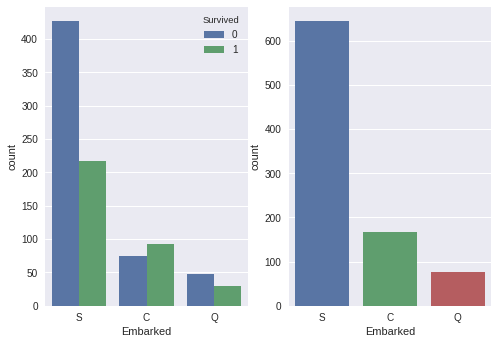

In [16]:
# We visualize 'Embarked' feature before filling the null values

import warnings
warnings.filterwarnings("ignore")

fig, [ax1, ax2] = plt.subplots(1,2)
sns.countplot(x = train.Embarked, hue = train.Survived, data = train, ax = ax1)
sns.countplot(x = train.Embarked, data = train, ax = ax2)

## Methods to locate missing values 

There are different ways we can locate the exact positon of missing values.

1) One is **np.where(df['column'].isnull())** that returns the indices and using **df.loc[]** we locate the missing values.  

2) Another method is by using callable function in **df.loc[callable]** we get the datafram directly containing missing value for particular column

In [17]:
# Use np.where()

ind = np.where(train['Embarked'].isnull())
ind

(array([ 61, 829]),)

In [18]:
print(train.loc[[61,829], :])
print('-----------------------------------------------------------')
print(train.loc[[61, 829], ['Survived','Age','Pclass']])

     Survived  Pclass     Sex   Age  SibSp  Parch  Ticket  Fare Embarked
61          1       1  female  38.0      0      0  113572  80.0      NaN
829         1       1  female  62.0      0      0  113572  80.0      NaN
-----------------------------------------------------------
     Survived   Age  Pclass
61          1  38.0       1
829         1  62.0       1


In [19]:
# Use callable function in df.loc()

train.loc[lambda x : x['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,female,38.0,0,0,113572,80.0,NaN
829,1,1,female,62.0,0,0,113572,80.0,NaN


We impute the missing values in Embarked feature with 'S' because the frequency of S is maximum

In [20]:
train.loc[lambda x : x['Embarked'].isnull(),'Embarked'] = 'S'

train.loc[[61,829]]


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,female,38.0,0,0,113572,80.0,S
829,1,1,female,62.0,0,0,113572,80.0,S


### Imputaion for feature 'Age'

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


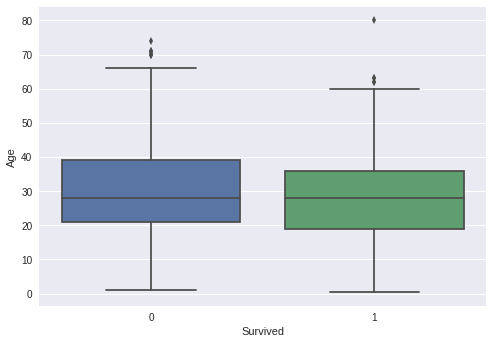

In [21]:
print(train['Age'].describe())

fig1,ax1 = plt.subplots(1, 1)

sns.boxplot(x = train['Survived'], y = train['Age'], data = train, ax = ax1)

Text(0, 0.5, 'Number of people')

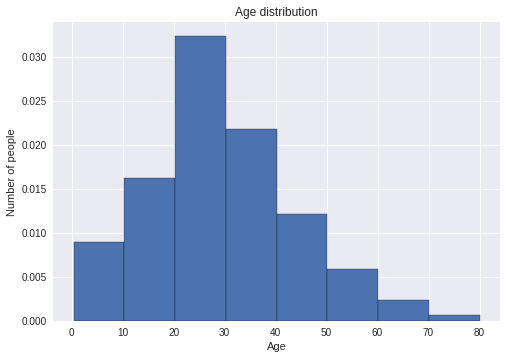

In [22]:
plt.hist(train['Age'], bins = 8, edgecolor = 'black', density = True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')

In [23]:
train.loc[lambda x : x['Age'].isnull(),'Survived'].value_counts(normalize = True)

0    0.706215
1    0.293785
Name: Survived, dtype: float64

In [0]:
"""
We drop the corresponding rows containing 'Null values' in feature 'Age'

"""

def drop_row(x):
  
  x = x.dropna(axis=0)
  
  return x

In [0]:
train = drop_row(train)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Ticket      714 non-null object
Fare        714 non-null float64
Embarked    714 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.8+ KB


In [0]:
# Drop Ticket column

train = train.drop('Ticket', axis=1)

## Visualize Features w.r.t Target Respone

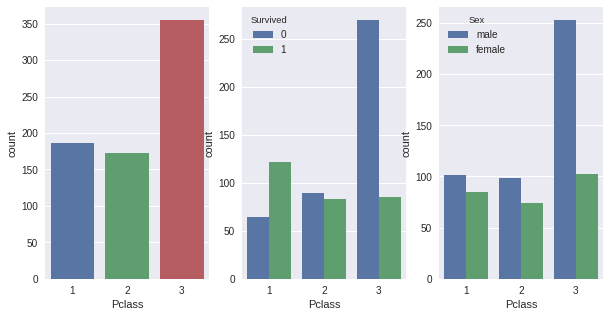

In [28]:
# Pclass - Survived

fig2, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(10,5))

sns.countplot(x = train['Pclass'], data = train, ax = ax1)

sns.countplot(x = train['Pclass'], hue = 'Survived', data=train, ax = ax2)

sns.countplot(x = train['Pclass'], hue = 'Sex', data = train, ax = ax3)

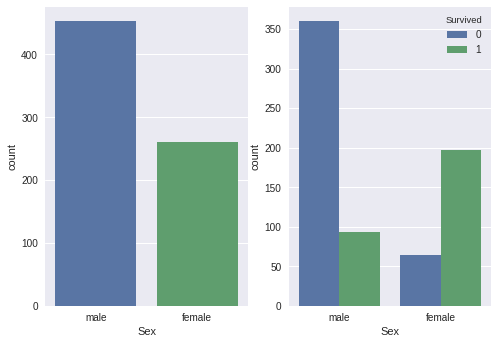

In [29]:
# Sex - Survived

fig4, [ax1, ax2] = plt.subplots(1,2)

sns.countplot(x = 'Sex', data = train, ax = ax1)

sns.countplot(x = 'Sex', hue = 'Survived', data = train, ax = ax2)

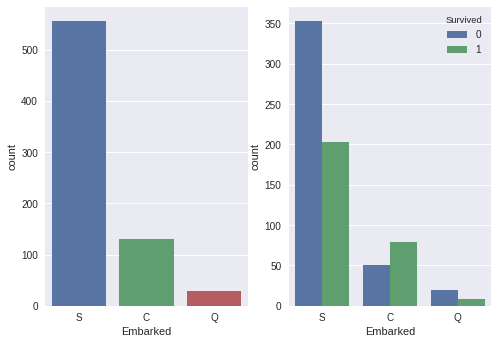

In [30]:
# Embarked - Survived

fig5, [ax1, ax2] = plt.subplots(1,2)

sns.countplot(x = 'Embarked', data = train, ax = ax1)

sns.countplot(x = 'Embarked', hue = 'Survived', data = train, ax = ax2)

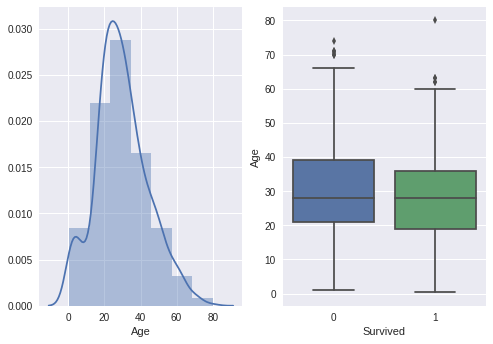

In [31]:
# Age - Survived

fig6, [ax1, ax2] = plt.subplots(1,2)

sns.distplot(train['Age'], bins = 7, norm_hist = True, ax = ax1)

sns.boxplot(x = 'Survived', y = 'Age', data = train, ax = ax2)

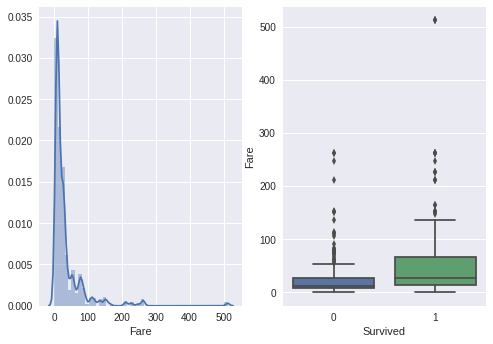

In [32]:
# Fare - Survived

fig7, [ax1, ax2] = plt.subplots(1,2)

sns.distplot(train['Fare'], norm_hist = True, ax = ax1)


sns.boxplot(x = 'Survived', y = 'Fare', data = train, ax = ax2)

In **Age** feature we have outliers which might be fatal for ML modeling

0    65.966387
1    25.630252
2     3.501401
4     2.521008
3     1.680672
5     0.700280
Name: SibSp, dtype: float64


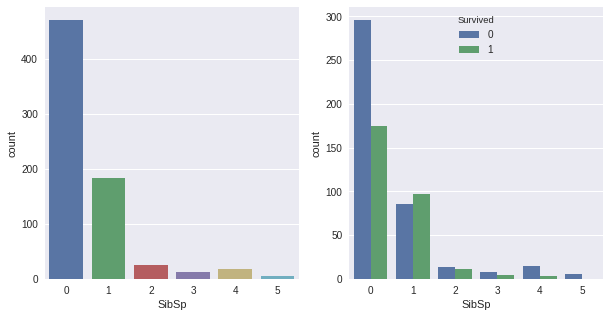

In [33]:
# SibSp - Survived

print(train['SibSp'].value_counts(normalize = True)*100)

fig7, [ax1,ax2] = plt.subplots(1,2, figsize = (10,5))

sns.countplot(x = 'SibSp', data = train, ax = ax1)

sns.countplot(x = 'SibSp', hue = 'Survived', data = train,ax = ax2)

0    72.969188
1    15.406162
2     9.523810
5     0.700280
3     0.700280
4     0.560224
6     0.140056
Name: Parch, dtype: float64


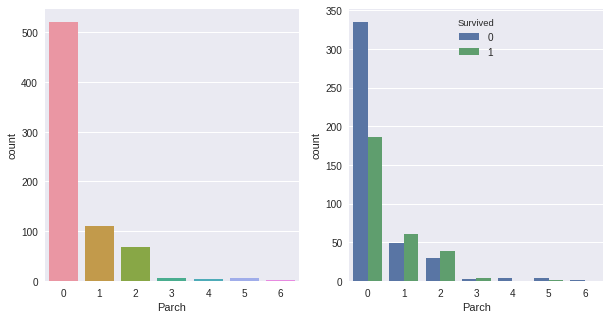

In [34]:
# Parch - Survived

print(train['Parch'].value_counts(normalize = True)*100)

fig8, [ax1,ax2] = plt.subplots(1,2, figsize = (10,5))

sns.countplot(x = 'Parch', data = train, ax = ax1)

sns.countplot(x = 'Parch', hue = 'Survived', data = train,ax = ax2)

## Feature Engineering

In [0]:
"""

We combine 'SibSp' and 'Parch' to form a single feature 'IsAlone'.
IsAlone is a binary categorical feature which says if the person was 
travelling alone

"""

train['IsAlone'] = train['SibSp'] + train['Parch']

In [36]:
train.loc[lambda x : x['IsAlone'] > 0, 'IsAlone'] = 1

print(train['IsAlone'].value_counts(normalize = True) * 100)

0    56.582633
1    43.417367
Name: IsAlone, dtype: float64


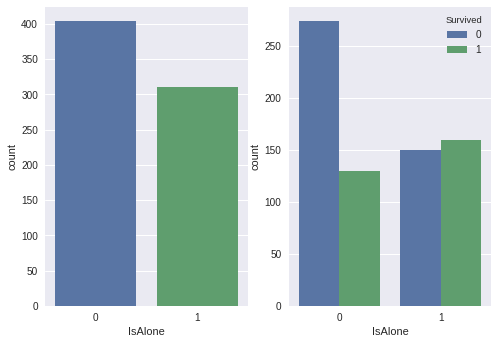

In [37]:
# Visualize 'IsAlone' feature

fig8, [ax1, ax2] = plt.subplots(1,2)

sns.countplot(x = 'IsAlone', data = train, ax = ax1)

sns.countplot(x = 'IsAlone', data = train, hue = 'Survived', ax = ax2)

### Drop SibSp and Parch

In [38]:
train = train.drop(['SibSp','Parch'],axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


## Prepare the Test Set

In [0]:
""""

1. del_feat(x) ~ PassengerId, Name, 'Cabin'
2. drop_row(x) ~ NA for Age
3. Ticket

"""

test = del_feat(test_orig)

test = test.drop('Ticket', axis = 1)

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


### Impute the missing values in Age feature

In [41]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [42]:
np.random.seed(0)

test.loc[lambda x : x['Age'].isnull(), 'Age'] = np.random.randint(30-14, 30+14)

test.loc[lambda x : x['Fare'].isnull(), 'Fare'] = test['Fare'].mean()


test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


### Save the data for ML modeling

In [0]:
train.to_csv('/content/train_data.csv', index = False)

test.to_csv('/content/test_data.csv',index = False)

In [0]:
from google.colab import files

In [0]:
files.download('/content/train_data.csv')

In [0]:
files.download('/content/test_data.csv')